In [4]:
import pandas as pd
from scipy.stats import sem, t
df = pd.read_csv('results.csv')
print(df.head())
df = df.drop(columns=['AUC (paper)'], errors='ignore')
grouped = df.groupby('Dataset').agg({
    "AP": ["mean", sem],
    "Execution Time (s)": ["mean", sem],
    "AUC (sklearn)": ["mean", sem],
    "Run": "max"  
})
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
confidence = 0.95
for col in ["AP_mean", "Execution Time (s)_mean", "AUC (sklearn)_mean"]:
    sem_col = col.replace("_mean", "_sem")
    ci_col = col.replace("_mean", "_95% CI")
    grouped[ci_col] = grouped[sem_col] * t.ppf((1 + confidence) / 2, grouped['Run_max'] - 1)
    combined_col = col.replace("_mean", "_combined")
    grouped[combined_col] = grouped[col].round(3).astype(str) + " ± " + grouped[ci_col].round(3).astype(str)

grouped_combined = grouped[["Dataset"] + [col for col in grouped.columns if "_combined" in col]]
grouped_combined.to_csv('grouped_combined_results.csv', index=False)

print(grouped_combined)


   Dataset  Run        AP  Execution Time (s)  AUC (sklearn)  AUC (paper)
0  abalone    1  0.190699          223.470119       0.860519     0.860519
1  abalone    2  0.246414          226.000465       0.869618     0.869618
2  abalone    3  0.241190          222.239137       0.870685     0.870685
3  abalone    4  0.280007          226.616883       0.868962     0.868962
4  abalone    5  0.209005          222.299450       0.857656     0.857656
         Dataset    AP_combined Execution Time (s)_combined  \
0        abalone  0.237 ± 0.024             225.288 ± 2.065   
1     annthyroid  0.396 ± 0.019            879.233 ± 12.034   
2        kdd_ftp   0.28 ± 0.008             584.568 ± 5.473   
3     magicgamma  0.623 ± 0.008          3842.101 ± 136.297   
4    mammography  0.219 ± 0.021           1503.501 ± 26.996   
5          mnist  0.303 ± 0.006            3029.41 ± 39.895   
6           musk  0.771 ± 0.061           1676.021 ± 39.135   
7      satellite  0.593 ± 0.012           1052.739 ±

In [5]:
import pandas as pd
from scipy.stats import sem, t
df = pd.read_csv('all_run_results_checkpoint.csv')
print(df.head())
df = df.drop(columns=['AUC (paper)'], errors='ignore')
grouped = df.groupby(['Dataset', 'Model']).agg({
    "AP": ["mean", sem],
    "AUC_capymoa": ["mean", sem],
    "AUC (sklearn)": ["mean", sem],
    "Execution Time (s)": ["mean", sem],
    "Run": "max"  

grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
confidence = 0.95
for col in ["AP_mean", "AUC_capymoa_mean", "AUC (sklearn)_mean", "Execution Time (s)_mean"]:
    sem_col = col.replace("_mean", "_sem")
    ci_col = col.replace("_mean", "_95% CI")
    grouped[ci_col] = grouped[sem_col] * t.ppf((1 + confidence) / 2, grouped['Run_max'] - 1)

    combined_col = col.replace("_mean", "_combined")
    grouped[combined_col] = grouped[col].round(3).astype(str) + " ± " + grouped[ci_col].round(3).astype(str)
grouped_combined = grouped[["Dataset", "Model"] + [col for col in grouped.columns if "_combined" in col]]
grouped_combined.to_csv('grouped_combined_results_by_model.csv', index=False)

print(grouped_combined)


   Dataset           Model  Run        AP  AUC_capymoa  AUC (sklearn)  \
0  abalone  HalfSpaceTrees    1  0.531285     0.962755       0.962755   
1  abalone  HalfSpaceTrees    2  0.531285     0.962755       0.962755   
2  abalone  HalfSpaceTrees    3  0.531285     0.962755       0.962755   
3  abalone  HalfSpaceTrees    4  0.531285     0.962755       0.962755   
4  abalone  HalfSpaceTrees    5  0.531285     0.962755       0.962755   

   AUC (paper)  Execution Time (s)  
0     0.962755            0.245574  
1     0.962755            0.297251  
2     0.962755            0.086631  
3     0.962755            0.192343  
4     0.962755            0.195962  
         Dataset                  Model  AP_combined AUC_capymoa_combined  \
0        abalone            Autoencoder  0.116 ± 0.0          0.855 ± 0.0   
1        abalone         HalfSpaceTrees  0.531 ± 0.0          0.963 ± 0.0   
2        abalone  OnlineIsolationForest  0.033 ± 0.0          0.318 ± 0.0   
3     annthyroid            Aut

In [ ]:
import pandas as pd
streamrhf_results = pd.read_csv('grouped_combined_results.csv') 
model_results = pd.read_csv('grouped_combined_results_by_model.csv')  
pivoted_model_results = model_results.pivot(index='Dataset', columns='Model', values='AUC (sklearn)_combined')
streamrhf_ap = streamrhf_results[['Dataset', 'AUC (sklearn)_combined']]
streamrhf_ap = streamrhf_ap.rename(columns={'AUC (sklearn)_combined': 'StreamRHf'})
streamrhf_ap = streamrhf_ap.set_index('Dataset')
pivoted_model_results = pivoted_model_results.reset_index().set_index('Dataset')
merged_ap_table = pd.concat([streamrhf_ap, pivoted_model_results], axis=1)
merged_ap_table.to_csv('consolidated_auc_table.csv')

print(merged_ap_table)


                  StreamRHf  Autoencoder HalfSpaceTrees OnlineIsolationForest
Dataset                                                                      
abalone       0.862 ± 0.005  0.855 ± 0.0    0.963 ± 0.0           0.318 ± 0.0
annthyroid    0.865 ± 0.006  0.534 ± 0.0    0.974 ± 0.0           0.516 ± 0.0
kdd_ftp       0.423 ± 0.022  0.124 ± 0.0    0.662 ± 0.0            0.35 ± 0.0
magicgamma     0.701 ± 0.01    0.5 ± 0.0    0.382 ± 0.0           0.396 ± 0.0
mammography   0.858 ± 0.004  0.766 ± 0.0    0.912 ± 0.0           0.749 ± 0.0
mnist         0.809 ± 0.005    0.5 ± 0.0    0.558 ± 0.0           0.499 ± 0.0
musk           0.98 ± 0.007    0.5 ± 0.0    0.026 ± 0.0           0.612 ± 0.0
satellite     0.939 ± 0.009    0.5 ± 0.0    0.975 ± 0.0           0.541 ± 0.0
satimages     0.989 ± 0.003    0.5 ± 0.0    0.965 ± 0.0           0.494 ± 0.0
shuttle_odds  0.994 ± 0.003    0.5 ± 0.0    0.899 ± 0.0           0.101 ± 0.0
spambase      0.636 ± 0.034  0.678 ± 0.0    0.271 ± 0.0         

In [ ]:
import pandas as pd
streamrhf_results = pd.read_csv('grouped_combined_results.csv')  # Dataset-level statistics
model_results = pd.read_csv('grouped_combined_results_by_model.csv')  # Dataset-Model level statistics
pivoted_model_results = model_results.pivot(index='Dataset', columns='Model', values='AUC (sklearn)_combined')
streamrhf_ap = streamrhf_results[['Dataset', 'AUC (sklearn)_combined']]
streamrhf_ap = streamrhf_ap.rename(columns={'AUC (sklearn)_combined': 'StreamRHf'})
streamrhf_ap = streamrhf_ap.set_index('Dataset')
pivoted_model_results = pivoted_model_results.reset_index().set_index('Dataset')
merged_ap_table = pd.concat([streamrhf_ap, pivoted_model_results], axis=1)
merged_ap_table.to_csv('consolidated_auc_table.csv')

print(merged_ap_table)


In [11]:
import pandas as pd
streamrhf_results = pd.read_csv('grouped_combined_results.csv')  
model_results = pd.read_csv('grouped_combined_results_by_model.csv')  
pivoted_model_results = model_results.pivot(index='Dataset', columns='Model', values='Execution Time (s)_combined')
streamrhf_ap = streamrhf_results[['Dataset', 'Execution Time (s)_combined']]
streamrhf_ap = streamrhf_ap.rename(columns={'Execution Time (s)_combined': 'StreamRHf'})
streamrhf_ap = streamrhf_ap.set_index('Dataset')
pivoted_model_results = pivoted_model_results.reset_index().set_index('Dataset')
merged_ap_table = pd.concat([streamrhf_ap, pivoted_model_results], axis=1)
merged_ap_table

,StreamRHf,Autoencoder,HalfSpaceTrees,OnlineIsolationForest
Dataset,,,,
abalone,225.288 ± 2.065,0.596 ± 0.028,0.189 ± 0.049,10.833 ± 0.085
annthyroid,879.233 ± 12.034,2.178 ± 0.009,0.231 ± 0.037,76.557 ± 0.165
kdd_ftp,584.568 ± 5.473,1.555 ± 0.002,0.168 ± 0.003,55.282 ± 0.104
magicgamma,3842.101 ± 136.297,5.803 ± 0.016,0.624 ± 0.182,262.773 ± 0.608
mammography,1503.501 ± 26.996,3.395 ± 0.03,0.343 ± 0.028,154.475 ± 0.2
mnist,3029.41 ± 39.895,2.816 ± 0.005,0.24 ± 0.0,101.119 ± 0.173
musk,1676.021 ± 39.135,1.292 ± 0.005,0.138 ± 0.072,25.223 ± 0.121
satellite,1052.739 ± 20.876,1.653 ± 0.002,0.165 ± 0.001,48.231 ± 0.134
satimages,1191.607 ± 37.227,1.877 ± 0.005,0.185 ± 0.0,66.675 ± 0.191


In [12]:
df = pd.DataFrame(merged_ap_table, index=[
    'abalone', 'annthyroid', 'kdd_ftp', 'magicgamma', 'mammography', 'mnist', 
    'musk', 'satellite', 'satimages', 'shuttle_odds', 'spambase', 'thyroid'
])

# Dataset points dictionary
dataset_points = {
    "abalone": 1920,
    "annthyroid": 7200,
    "kdd_ftp": 5214,
    "magicgamma": 19020,
    "mammography": 11183,
    "mnist": 7603,
    "musk": 3062,
    "satellite": 5100,
    "satimages": 5803,
    "shuttle_odds": 49097,
    "spambase": 4601,
    "thyroid": 3772
}

def extract_mean_and_std(value):
    mean, std = map(float, value.split('±'))
    return mean, std
def normalize_row(row, dataset_name):
    divisor = dataset_points[dataset_name]
    normalized = {}
    for col in row.index:
        mean, std = extract_mean_and_std(row[col])
        mean, std = mean*1000, std *1000
        normalized[col] = f"{mean / divisor:.6f} ± {std / divisor:.6f}"
    return pd.Series(normalized)

normalized_df = df.apply(lambda row: normalize_row(row, row.name), axis=1)
print(normalized_df)

                           StreamRHf          Autoencoder  \
abalone        117.337500 ± 1.075521  0.310417 ± 0.014583   
annthyroid     122.115694 ± 1.671389  0.302500 ± 0.001250   
kdd_ftp        112.115075 ± 1.049674  0.298236 ± 0.000384   
magicgamma     202.003207 ± 7.165983  0.305100 ± 0.000841   
mammography    134.445229 ± 2.414021  0.303586 ± 0.002683   
mnist          398.449296 ± 5.247271  0.370380 ± 0.000658   
musk          547.361528 ± 12.780862  0.421946 ± 0.001633   
satellite      206.419412 ± 4.093333  0.324118 ± 0.000392   
satimages      205.343271 ± 6.415130  0.323453 ± 0.000862   
shuttle_odds   189.577184 ± 6.057763  0.304316 ± 0.002302   
spambase       177.933710 ± 2.604651  0.337535 ± 0.000869   
thyroid        112.400583 ± 0.946713  0.302757 ± 0.000795   

                   HalfSpaceTrees OnlineIsolationForest  
abalone       0.098437 ± 0.025521   5.642188 ± 0.044271  
annthyroid    0.032083 ± 0.005139  10.632917 ± 0.022917  
kdd_ftp       0.032221 ± 0.00057

In [15]:
normalized_df.to_csv('time.csv')

In [14]:
df = normalized_df
def extract_mean_and_std(value):
    mean, std = value.split(" ± ")
    return float(mean), float(std)
means = df.applymap(lambda x: extract_mean_and_std(x)[0])
stds = df.applymap(lambda x: extract_mean_and_std(x)[1])
mean_of_means = means.mean()
median_of_means = means.median()
mean_of_stds = stds.mean()
median_of_stds = stds.median()
summary = pd.DataFrame({
    "Mean (mean)": mean_of_means.round(3).astype(str) + " ± " + mean_of_stds.round(3).astype(str),
    "Median (mean)": median_of_means.round(3).astype(str) + " ± " + median_of_stds.round(3).astype(str)
})

# Display the summary
print(summary)

                           Mean (mean)    Median (mean)
StreamRHf              210.458 ± 4.294  183.755 ± 3.349
Autoencoder              0.325 ± 0.002    0.308 ± 0.001
HalfSpaceTrees           0.039 ± 0.006    0.032 ± 0.002
OnlineIsolationForest   10.485 ± 0.049   10.618 ± 0.029


/tmp/ipykernel_708978/3748878358.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  means = df.applymap(lambda x: extract_mean_and_std(x)[0])
/tmp/ipykernel_708978/3748878358.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stds = df.applymap(lambda x: extract_mean_and_std(x)[1])


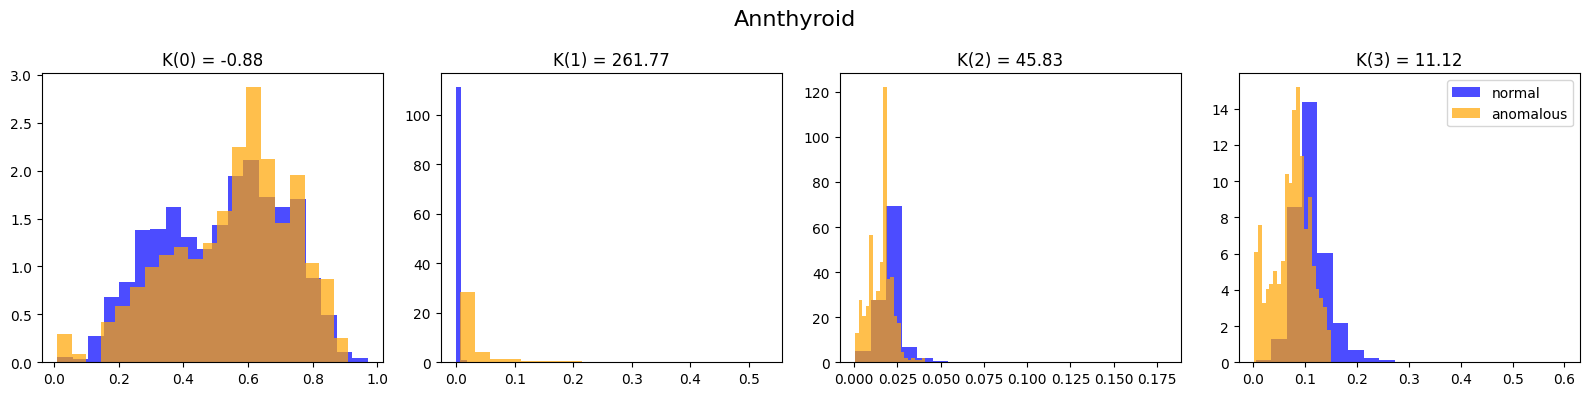

In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

dataset_name = "annthyroid"
dataset_path = r"/home/infres/benedetti-23/CapyMOA/public/annthyroid.gz"
df = pd.read_csv(dataset_path)

normal_data = df[df['label'] == 0]  # Adjust if normal data is labeled differently
anomalous_data = df[df['label'] == 1]  # Adjust if anomalous data is labeled differently
features = [col for col in df.columns if col != 'label'][:4] 
n_features = len(features)
rows = (n_features + 3) // 4 
fig, axes = plt.subplots(rows, 4, figsize=(16, 4 * rows))
axes = axes.ravel()

for idx, feature in enumerate(features):
    ax = axes[idx]
    norm_values = normal_data[feature].values
    anom_values = anomalous_data[feature].values
    ax.hist(norm_values, bins=20, alpha=0.7, label='normal', color='blue', density=True)
    ax.hist(anom_values, bins=20, alpha=0.7, label='anomalous', color='orange', density=True)
    combined_values = np.concatenate([norm_values, anom_values])
    k_score = kurtosis(combined_values)
    ax.set_title(f"K({feature}) = {k_score:.2f}")
    
fig.suptitle("Annthyroid", fontsize=16)
# Turn off unused subplots
for ax in axes[n_features:]:
    ax.axis('off')
fig.tight_layout()
plt.legend(loc='upper right')
plt.savefig(f"{dataset_name}_kurtosis.png", dpi = 500)
plt.show()
